In [1]:
import pickle
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import os
import torch
import numpy as np
import torch.nn.functional as F
import sys

In [2]:
sys.path.append('.')
sys.path.append('../src')
from models import model
from dataset import data

In [3]:
path4 = os.path.abspath('../')  # указывает предыдущий каталог каталога, в котором находится текущий файл
filepath = path4 + '\output\\history.txt'

In [4]:
with open(filepath, 'rb') as f:
    history = pickle.load(f)

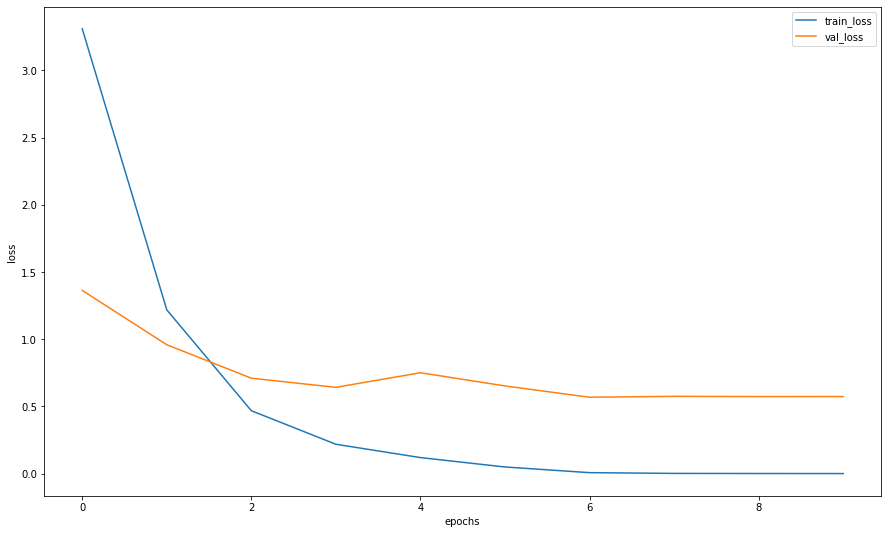

In [5]:
loss, acc, val_loss, val_acc = zip(*history)
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

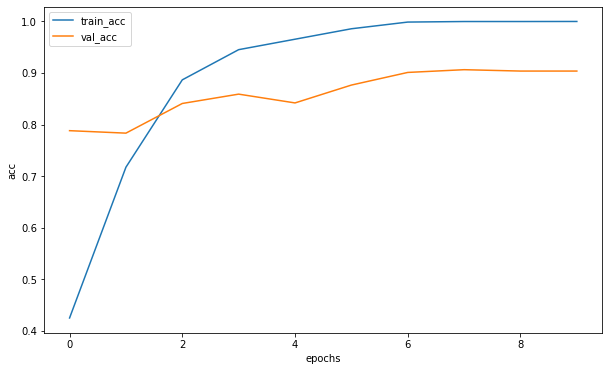

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(acc, label="train_acc")
plt.plot(val_acc, label="val_acc")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

In [7]:
filepath = path4 + '\output\\arcface.pth'
arcface = model('ArcFace')
arcface.load_state_dict(torch.load(filepath, map_location=torch.device('cpu')))
train_loader, val_loader, test_loader = data('ArcFace')
device = 'cpu'

In [8]:
def predict(model, test_loader):
    with torch.no_grad():
        preds = []
        targets = []
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            model.eval()
            outputs = model(inputs).cpu()
            labels = labels.to(device)
            preds.append(outputs.detach().cpu())
            targets.append(labels.data.cpu())

    preds = F.softmax(torch.cat(preds), dim=-1).numpy()
    return preds, targets

In [9]:
pred, target = predict(arcface, test_loader)
preds = np.argmax(pred, -1)
target_modified = torch.cat(target, -1).numpy()

print(f1_score(target_modified, preds, average='micro'))

0.8942731277533039
